# Linear Discriminant Analysis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [9]:
# get the data
penguins = pd.read_csv('penguins_size.csv').dropna()
penguins.head()

# we only take the first two features to make it more challenging 
X = penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']].values
le = LabelEncoder()
y = le.fit_transform(penguins['species'])

In [25]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [37]:
# Performance without LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:',accuracy_score(y_pred,y_test))
(np.sum(y_pred == y_test))/len(y_test)
# Comment: logistic regression without LDA does struggles to converge

Accuracy: 0.9880952380952381


/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9880952380952381

In [30]:
# Run one-dimensional LDA (Fisher)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#
# Documentation is here:
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
#
lda = LDA(n_components=1)
X_train1 = lda.fit_transform(X_train,y_train)

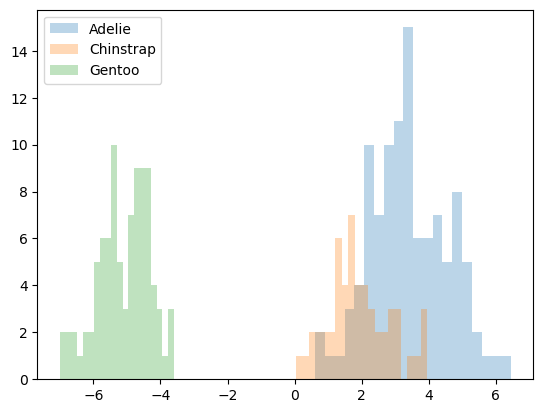

In [33]:
# plot the Discriminant dimension
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=20)
plt.hist(X_train1[y_train==0], **kwargs)
plt.hist(X_train1[y_train==1], **kwargs)
plt.hist(X_train1[y_train==2], **kwargs)
plt.legend(le.classes_)

In [7]:
# --->>> Your turn <<<---
# Use LDA to reduce the dataset to two dimensions,
# and check how well the linear regression model works on the reduced dataset.